# Tester_branch에서 성능 확인 진행

In [1]:
# 라이브러리 및 데이터 불러오기

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt

wine = load_wine()

''' 데이터 코드를 작성해주세요 '''
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

# feature와 target 분리
X = df.drop('target', axis=1)
y = df['target']

# train/test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# feature로 사용할 데이터에서는 'target' 컬럼을 drop합니다.
# target은 'target' 컬럼만을 대상으로 합니다.
# X, y 데이터를 test size는 0.2, random_state 값은 42로 하여 train 데이터와 test 데이터로 분할합니다.

# DT 모델링 성능

Best Hyper-parameter {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Score 0.9362068965517242


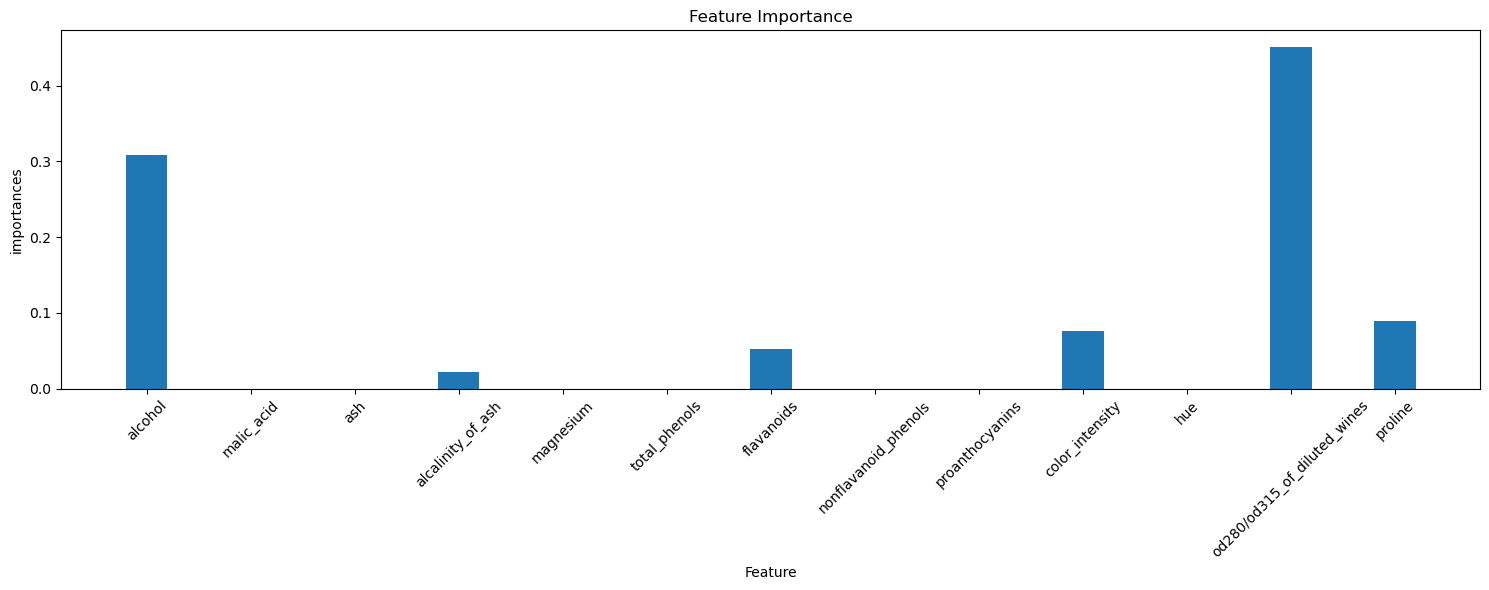

In [3]:
from sklearn.metrics import classification_report, accuracy_score

''' 코드를 작성해주세요 '''
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyper-parameter", best_params)
best_score = grid_search.best_score_
print("Best Score", best_score)

clf_best = DecisionTreeClassifier(**best_params)
clf_best.fit(X_train, y_train)

import matplotlib.pyplot as plt
import numpy as np

features = wine.feature_names
importances = clf_best.feature_importances_
features = X.columns

plt.figure(figsize=(15,6))
plt.title('Feature Importance')
plt.bar(features, importances, width=0.4)
plt.xticks(features, rotation=45)
plt.xlabel("Feature")
plt.ylabel('importances')
plt.tight_layout()
plt.show()

<img src="../참고이미지/Git/DT_Modeling.png" width="80%">

# XGB 모델링 성능

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best accuracy: 0.9576354679802955


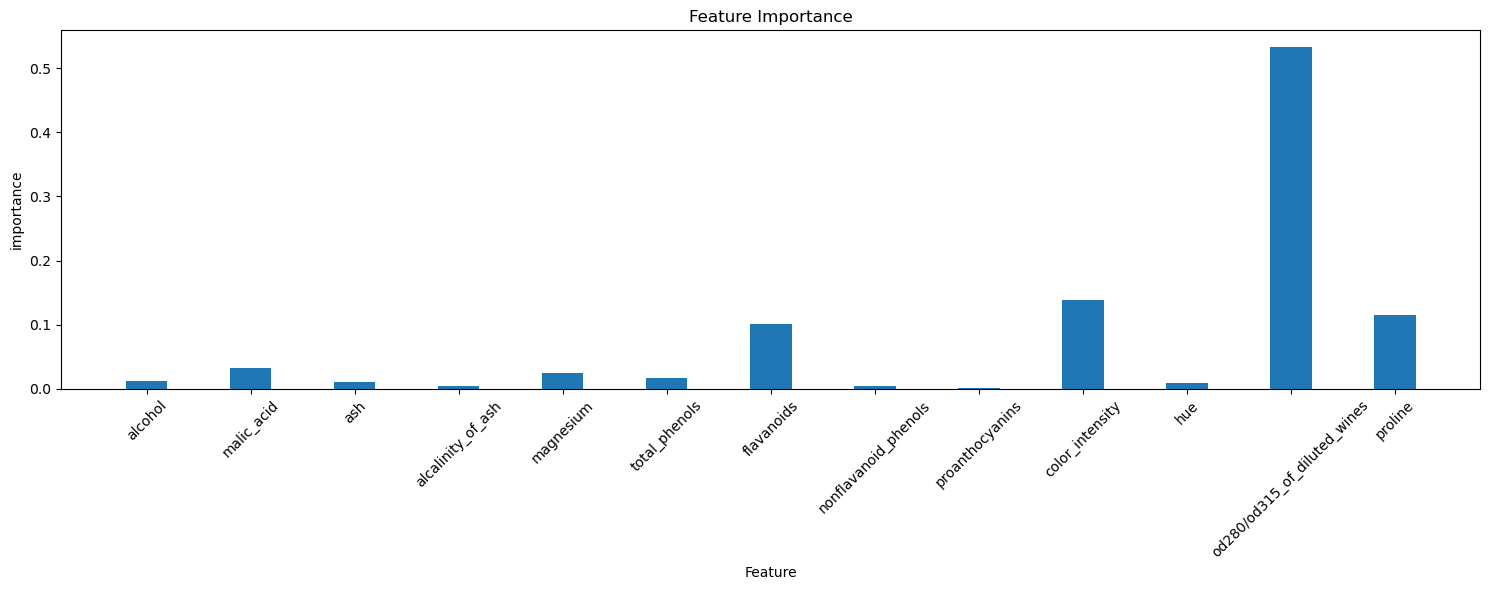

In [6]:
''' 코드를 작성해주세요 '''
param_grid = {
    'max_depth': [3, 5, 7, 9, 15],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200, 300]
}

from xgboost import XGBClassifier
xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)
best_score = grid_search.best_score_
print("Best accuracy:", best_score)

xgb_best = XGBClassifier(**best_params)
xgb_best.fit(X_train, y_train)

xgb_best = grid_search.best_estimator_
importances = xgb_best.feature_importances_
features = X.columns

plt.figure(figsize=(15,6))
plt.title('Feature Importance')
plt.bar(features, importances, width=0.4)
plt.xticks(rotation=45)
plt.xlabel("Feature")
plt.ylabel("importance")
plt.tight_layout()
plt.show()

<img src="../참고이미지/Git/XGB_Modeling.png" width="80%">`

# 성능 비교 시각화

DT accuracy : 0.9166666666666666
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.88      1.00      0.93        14
           2       1.00      0.62      0.77         8

    accuracy                           0.92        36
   macro avg       0.94      0.88      0.89        36
weighted avg       0.93      0.92      0.91        36

XGB accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



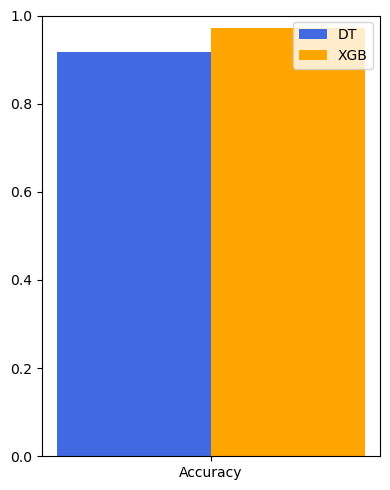

In [33]:
''' 코드를 작성해주세요 '''
y_pred = clf_best.predict(X_test)
clf_acc = accuracy_score(y_test, y_pred)
print("DT accuracy :", clf_acc)
print(classification_report(y_test, y_pred))

y_pred = xgb_best.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred)
print("XGB accuracy:", xgb_acc)
print(classification_report(y_test, y_pred))

# models = ['DT', 'XGB']
# scores = [clf_acc, xgb_acc]

# plt.figure(figsize=(8,6))
# plt.bar(models, scores, color=['royalblue', 'orange'], label=['DT', 'XGB'])
# plt.legend()
# plt.ylim(0, 1)
# plt.tight_layout()
# plt.show()
labels = ['Accuracy']  # x축에 하나의 그룹만
dt_scores = [clf_acc]
xgb_scores = [xgb_acc]

x = np.arange(len(labels))  # x축 위치 (여기선 0)
width = 0.25  # bar 폭을 줄임

fig, ax = plt.subplots(figsize=(4,5))
rects1 = ax.bar(x - width/2, dt_scores, width, label='DT', color='royalblue')
rects2 = ax.bar(x + width/2, xgb_scores, width, label='XGB', color='orange')

ax.set_ylim(0, 1)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper right')  # legend를 오른쪽 상단에 위치
plt.tight_layout()
plt.show()

<img src="../참고이미지/Git/성능_비교_시각화.png" width="40%">